# Credit Card Fraud Detection Visualizations
**Team:** Fraud Detectives  
**Course:** CS 445/545 Final Project Stage 2  
**Dataset:** Kaggle Credit Card Fraud Detection (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download) 


------------------------------------------

The Credit Card Fraud Detection dataset from Kaggle is a widely used real-world dataset containing transactions made by European cardholders in September 2013. 

It consists of 284,807 transactions, among which only 492 are fraudulent, making it highly imbalanced and challenging for machine learning algorithms. 

We chose this dataset because it presents a realistic and complex scenario for anomaly detection, requiring robust techniques to identify rare fraudulent activities among a vast majority of legitimate transactions. 

Its anonymized features (V1-V28), derived from PCA transformations, add an extra layer of complexity, making it ideal for exploring advanced data analysis, visualization, and fraud detection strategies. 

This dataset is particularly interesting due to its relevance in financial security and the opportunity it provides to develop and evaluate models that can have real-world impact in combating financial crime.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pandas.plotting import parallel_coordinates

# Load dataset
with zipfile.ZipFile('creditcard.csv.zip') as z:
    with z.open('creditcard.csv') as f:
        df = pd.read_csv(f)

# Preprocessing

df['Hour'] = (df['Time'] // 3600).astype(int)
df['LogAmount'] = np.log1p(df['Amount'])

df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,LogAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,4.262539
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,1.541159
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,1.790091
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0,3.732896
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0,4.545420
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0,1.543298


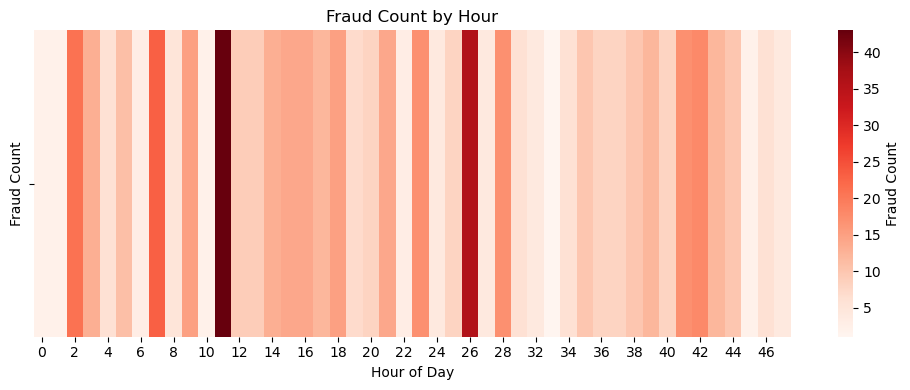

In [3]:
# 1. Fraud Hourly Heatmap
fraud_hourly = df[df['Class'] == 1].groupby(['Hour']).size().reset_index(name='Fraud Count')
heatmap_data = fraud_hourly.pivot_table(index='Hour', values='Fraud Count', aggfunc='sum').fillna(0)
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data.T, cmap="Reds", cbar_kws={'label': 'Fraud Count'})
plt.title("Fraud Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("")
plt.tight_layout()
plt.show()

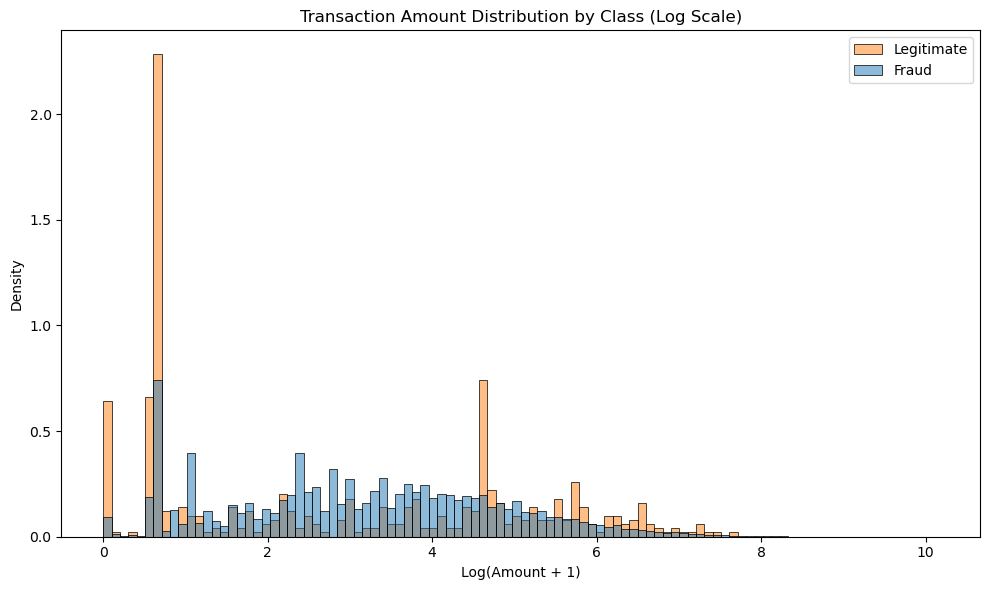

In [4]:
# 2. Transaction Amount Distribution by Class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='LogAmount', hue='Class', bins=100, stat='density', common_norm=False)
plt.title("Transaction Amount Distribution by Class (Log Scale)")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Density")
plt.legend(labels=["Legitimate", "Fraud"])
plt.tight_layout()
plt.show()

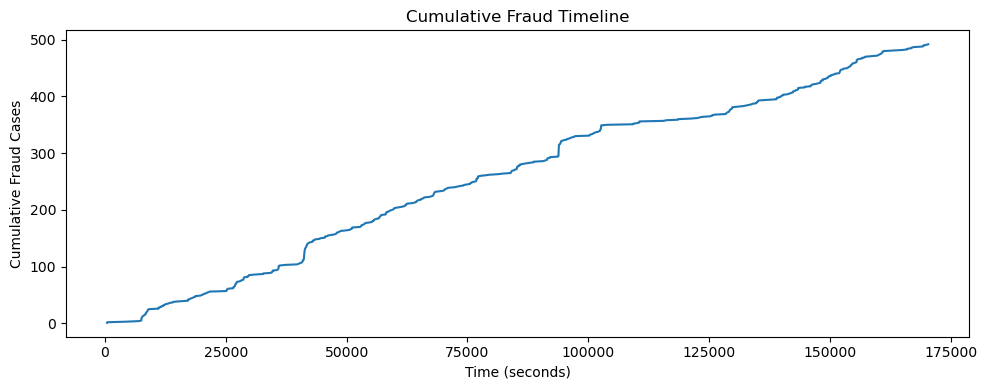

In [5]:
# 3. Cumulative Fraud Timeline
fraud_timeline = df[df['Class'] == 1].groupby('Time').size().cumsum()
plt.figure(figsize=(10, 4))
plt.plot(fraud_timeline.index, fraud_timeline.values)
plt.title("Cumulative Fraud Timeline")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Fraud Cases")
plt.tight_layout()
plt.show()

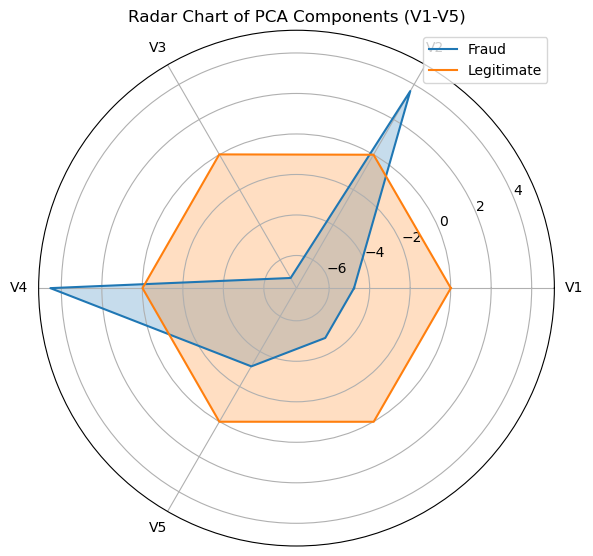

In [6]:
# 4. PCA Component Radar Chart
radar_df = pd.DataFrame({
    'Component': [f'V{i}' for i in range(1, 6)],
    'Fraud': df[df['Class'] == 1][[f'V{i}' for i in range(1, 6)]].mean().values,
    'Legitimate': df[df['Class'] == 0][[f'V{i}' for i in range(1, 6)]].mean().values
})

categories = radar_df['Component'].tolist()
fraud_vals = radar_df['Fraud'].tolist()
legit_vals = radar_df['Legitimate'].tolist()
categories += categories[:1]
fraud_vals += fraud_vals[:1]
legit_vals += legit_vals[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Ensure fraud_vals and legit_vals have the same length as angles
if len(fraud_vals) < len(angles):
    fraud_vals += fraud_vals[:1]
if len(legit_vals) < len(angles):
    legit_vals += legit_vals[:1]
plt.figure(figsize=(6, 6))

ax = plt.subplot(111, polar=True)
ax.plot(angles, fraud_vals, label='Fraud')
ax.fill(angles, fraud_vals, alpha=0.25)
ax.plot(angles, legit_vals, label='Legitimate')
ax.fill(angles, legit_vals, alpha=0.25)
ax.set_xticks(angles[:-2])  # Use only the first 5 angles
ax.set_xticklabels(categories[:-1])  # Use only the first 5 categories

plt.title("Radar Chart of PCA Components (V1-V5)")
plt.legend()
plt.tight_layout()
plt.show()



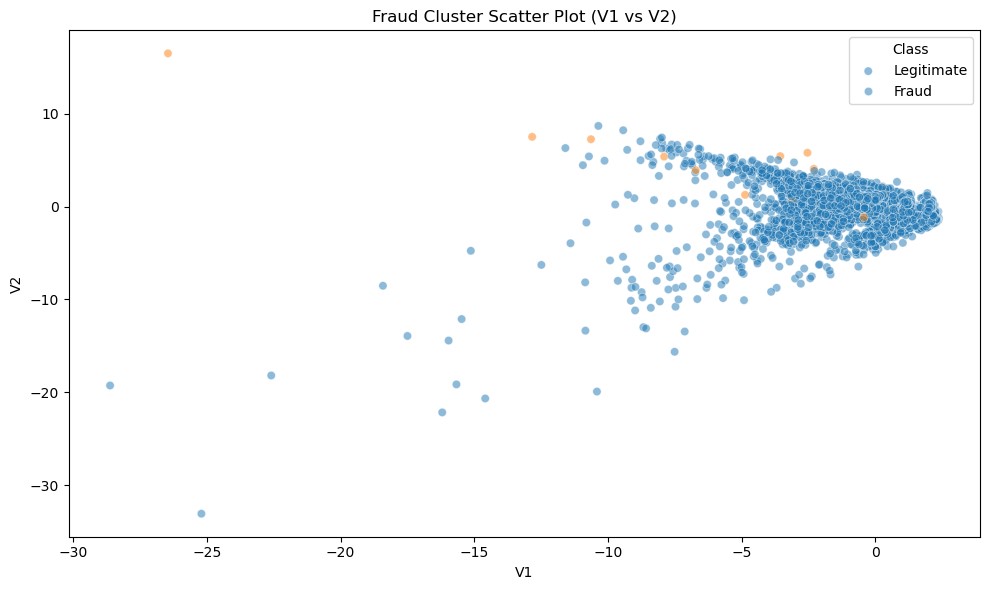

In [7]:
# 5. Fraud Cluster Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='V1', y='V2', hue='Class', alpha=0.5)
plt.title("Fraud Cluster Scatter Plot (V1 vs V2)")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.tight_layout()
plt.show()



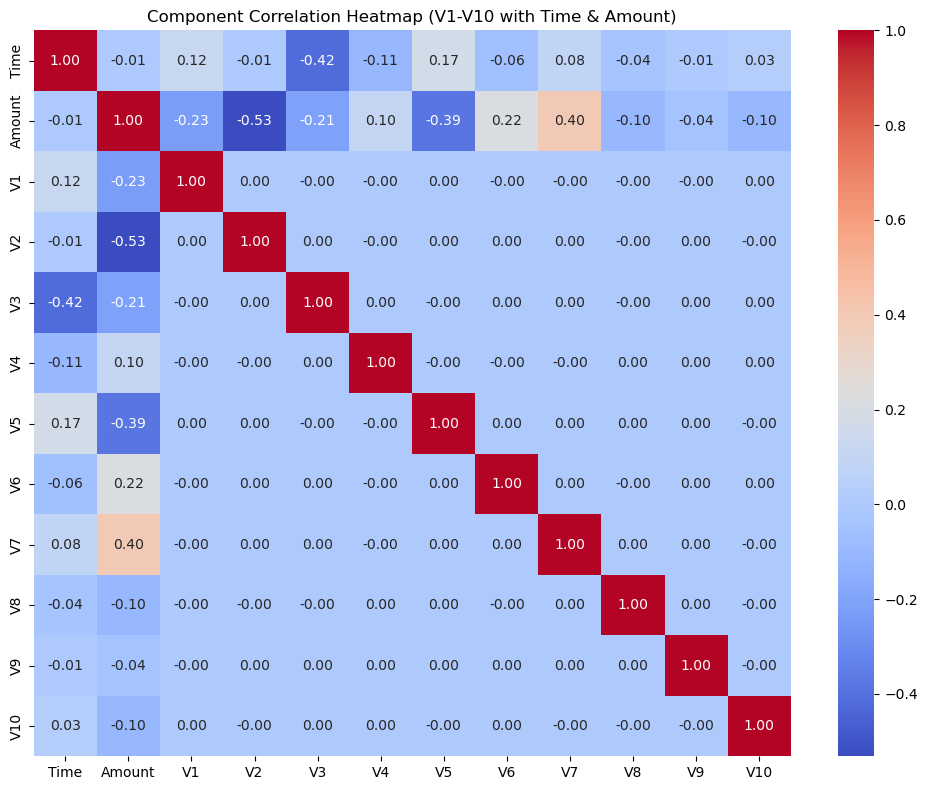

In [8]:
# 6. Component Correlation Heatmap
corr_data = df[['Time', 'Amount'] + [f'V{i}' for i in range(1, 11)]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Component Correlation Heatmap (V1-V10 with Time & Amount)")
plt.tight_layout()
plt.show()

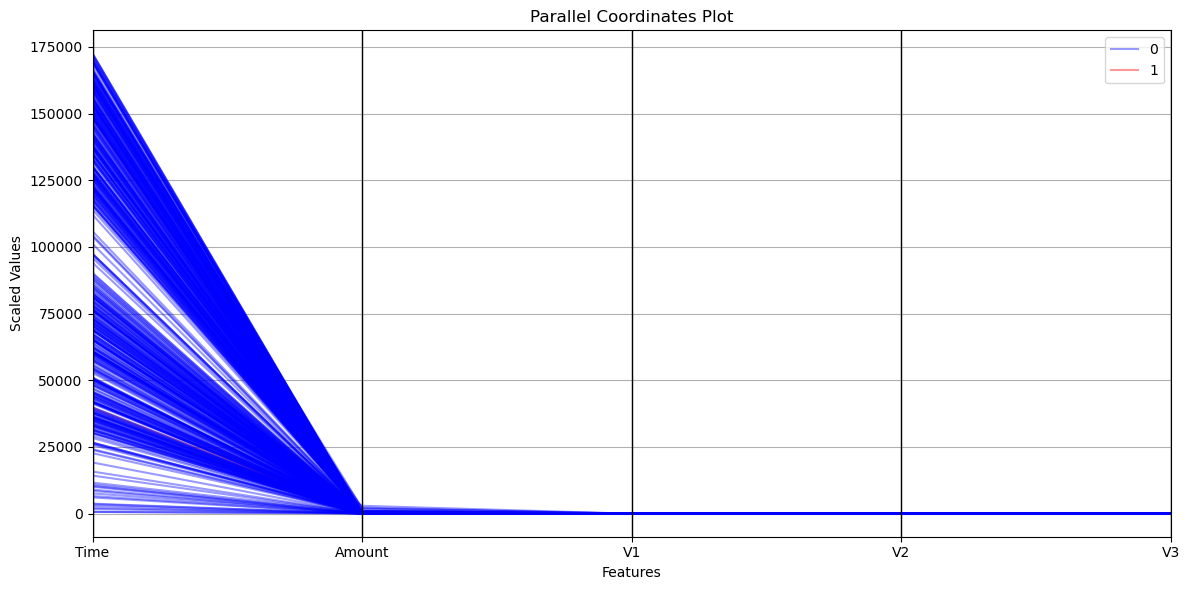

In [9]:
# 7. Parallel Coordinates Plot
parallel_data = df[['Time', 'Amount', 'V1', 'V2', 'V3', 'Class']].sample(500).copy()
parallel_data['Class'] = parallel_data['Class'].astype(str)
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, class_column='Class', color=['blue', 'red'], alpha=0.4)
plt.title("Parallel Coordinates Plot")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.tight_layout()
plt.show()

/var/folders/ds/wj6jlh7x2fgggfz75ng92c0m0000gn/T/ipykernel_9764/1873936705.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_bracket = df.groupby('AmountBracket')['Class'].mean().reset_index()
/var/folders/ds/wj6jlh7x2fgggfz75ng92c0m0000gn/T/ipykernel_9764/1873936705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_by_bracket, x='AmountBracket', y='Class', palette="viridis")


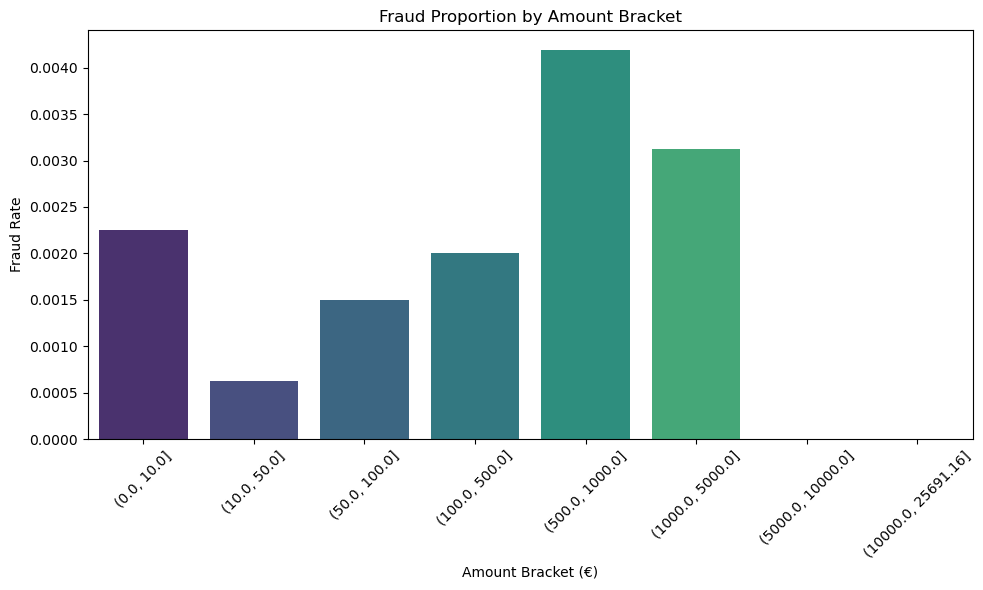

In [10]:
# 8. Fraud Proportion by Amount Bracket
df['AmountBracket'] = pd.cut(df['Amount'], bins=[0, 10, 50, 100, 500, 1000, 5000, 10000, df['Amount'].max()])
fraud_rate_by_bracket = df.groupby('AmountBracket')['Class'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_rate_by_bracket, x='AmountBracket', y='Class', palette="viridis")
plt.title("Fraud Proportion by Amount Bracket")
plt.xlabel("Amount Bracket (€)")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

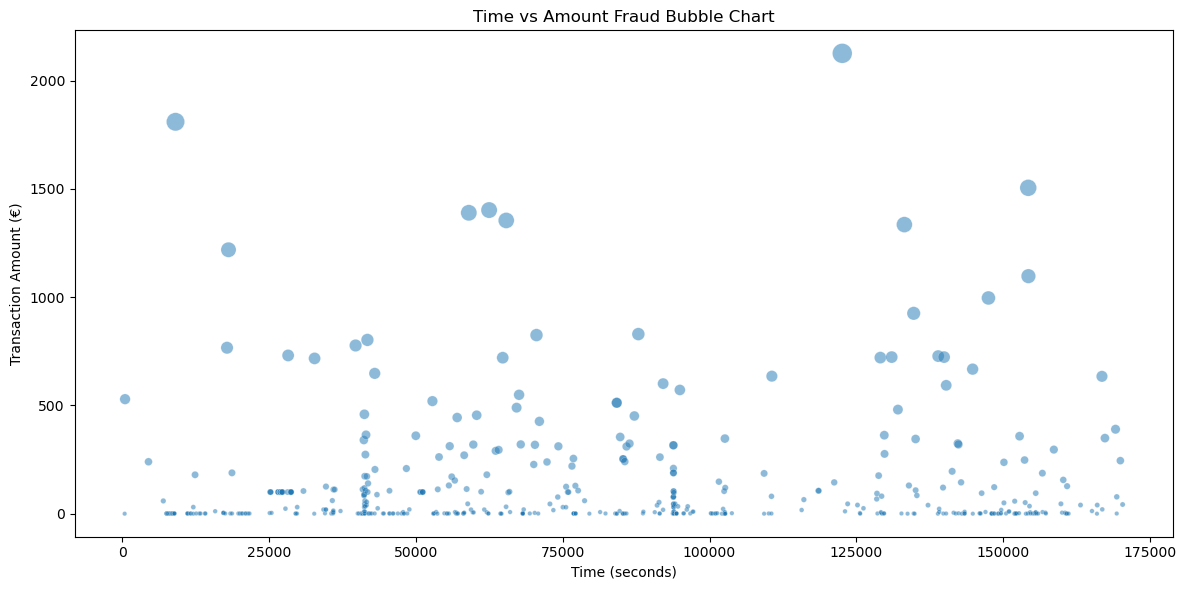

In [11]:
# 9. Time-Amount Fraud Bubble Chart
fraud_bubble = df[df['Class'] == 1][['Time', 'Amount']]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=fraud_bubble, x='Time', y='Amount', size='Amount', sizes=(10, 200), alpha=0.5, legend=False)
plt.title("Time vs Amount Fraud Bubble Chart")
plt.xlabel("Time (seconds)")
plt.ylabel("Transaction Amount (€)")
plt.tight_layout()
plt.show()